<a href="https://colab.research.google.com/github/marc-queiroz/unifil/blob/master/docs/big-data/slides/Big_Data_Como_instalar_o_PySpark_no_Google_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Big Data: Como instalar o PySpark no Google Colab

Como instalar o PySpark no Google Colab é uma dúvida comum entre aqueles que estão migrando seus projetos de Data Science para ambientes na nuvem.

O termo Big Data está cada vez mais presente, e mesmo projetos pessoais podem assumir uma grande dimensionalidade devido à quantidade de dados disponíveis.

Para analisar grandes volumes de dados, Big Data, com velocidade, o Apache Spark é uma ferramenta muito utilizada, dada a sua capacidade de processamento de dados e computação paralela.

O Spark foi pensado para ser acessível, oferecendo diversas APIs e frameworks em Python, Scala, SQL e diversas outras linguagens.

## PySpark no Google Colab

PySpark é a interface alto nível que permite você conseguir acessar e usar o Spark por meio da linguagem Python. Usando o PySpark, você consegue escrever todo o seu código usando apenas o nosso estilo Python de escrever código.

Já o Google Colab é uma ferramenta incrível, poderosa e gratuita – com suporte de GPU inclusive. Uma vez que roda 100% na nuvem, você não tem a necessidade de instalar qualquer coisa na sua própria máquina.

No entanto, apesar da maioria das bibliotecas de Data Science estarem previamente instaladas no Colab, o mesmo não acontece com o PySpark. Para conseguir usar o PySpark é necessário alguns passos intermediários, que não são triviais para aqueles que estão começando.

Dessa maneira, preparei um tutorial simples e direto ensinando a instalar as dependências e a biblioteca.

## Instalando o PySpark no Google Colab

Instalar o PySpark não é um processo direto como de praxe em Python. Não basta usar um pip install apenas. Na verdade, antes de tudo é necessário instalar dependências como o Java 8, Apache Spark 2.3.2 junto com o Hadoop 2.7.

In [3]:
# instalar as dependências
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!apt-get install axel
!axel -n 10 https://archive.apache.org/dist/spark/spark-2.4.4/spark-2.4.4-bin-hadoop2.7.tgz
#!apt-get install aria2
#!aria2c -x 16 https://archive.apache.org/dist/spark/spark-2.4.4/spark-2.4.4-bin-hadoop2.7.tgz
#!wget https://archive.apache.org/dist/spark/spark-2.4.4/spark-2.4.4-bin-hadoop2.7.tgz
!tar xf spark-2.4.4-bin-hadoop2.7.tgz
!pip install -q findspark

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  axel
0 upgraded, 1 newly installed, 0 to remove and 40 not upgraded.
Need to get 56.1 kB of archives.
After this operation, 181 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 axel amd64 2.16.1-1build1 [56.1 kB]
Fetched 56.1 kB in 1s (80.5 kB/s)
Selecting previously unselected package axel.
(Reading database ... 161180 files and directories currently installed.)
Preparing to unpack .../axel_2.16.1-1build1_amd64.deb ...
Unpacking axel (2.16.1-1build1) ...
Setting up axel (2.16.1-1build1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Initializing download: https://archive.apache.org/dist/spark/spark-2.4.4/spark-2.4.4-bin-hadoop2.7.tgz
File size: 230091034 bytes
Opening output file spark-2.4.4-bin-hadoop2.7.tgz
Starting download

[  0%]  .......... .......... .......... .......... 

A próxima etapa é configurar as variáveis de ambiente, pois isso habilita o ambiente do Colab a identificar corretamente onde as dependências estão rodando.

Para conseguir “manipular” o terminal e interagir como ele, você pode usar a biblioteca os.

In [4]:
# configurar as variáveis de ambiente
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.4-bin-hadoop2.7"

# tornar o pyspark "importável"
import findspark
findspark.init('spark-2.4.4-bin-hadoop2.7')

Com tudo pronto, vamos rodar uma sessão local para testar se a instalação funcionou corretamente.

In [6]:
# iniciar uma sessão local e importar dados do Airbnb
from pyspark.sql import SparkSession
sc = SparkSession.builder.master('local[*]').getOrCreate()

# download do http para arquivo local
# http://insideairbnb.com/get-the-data.html #Rio de Janeiro
!wget --quiet --show-progress http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2021-07-17/data/listings.csv.gz

!gunzip listings.csv.gz

# carregar dados do Airbnb
df_spark = sc.read.csv("./listings.csv", inferSchema=True, header=True)

# ver algumas informações sobre os tipos de dados de cada coluna
df_spark.printSchema()

listings.csv.gz     100%[===================>]  13.18M  18.5MB/s    in 0.7s    
root
 |-- id: string (nullable = true)
 |-- listing_url: string (nullable = true)
 |-- scrape_id: string (nullable = true)
 |-- last_scraped: string (nullable = true)
 |-- name: string (nullable = true)
 |-- description: string (nullable = true)
 |-- neighborhood_overview: string (nullable = true)
 |-- picture_url: string (nullable = true)
 |-- host_id: string (nullable = true)
 |-- host_url: string (nullable = true)
 |-- host_name: string (nullable = true)
 |-- host_since: string (nullable = true)
 |-- host_location: string (nullable = true)
 |-- host_about: string (nullable = true)
 |-- host_response_time: string (nullable = true)
 |-- host_response_rate: string (nullable = true)
 |-- host_acceptance_rate: string (nullable = true)
 |-- host_is_superhost: string (nullable = true)
 |-- host_thumbnail_url: string (nullable = true)
 |-- host_picture_url: string (nullable = true)
 |-- host_neighbourhood: strin

In [7]:
df_spark.toPandas().head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,17878,https://www.airbnb.com/rooms/17878,20210717121617,2021-07-17,"Very Nice 2Br in Copacabana w. balcony, fast WiFi","""Discounts for long term stays. <br />- Large ...",premium cable including channels in Engl.<br ...,a stone throw away from famous Copacabana Pal...,fridge,microwave,coffee maker,iron,hairdryer,vacuum cleaner,water filter - apt is fully equipped,you only need to bring your toothbrush<br />-...,This is the one of the bests spots in Rio. Bec...,https://a0.muscache.com/pictures/65320518/3069...,68997,https://www.airbnb.com/users/show/68997,Matthias,2010-01-08,"Rio de Janeiro, State of Rio de Janeiro, Brazil","""I am a journalist/writer. Lived for 15 year...",within an hour,100%,98%,f,https://a0.muscache.com/im/pictures/user/67b13...,https://a0.muscache.com/im/pictures/user/67b13...,Copacabana,2,2,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Rio de Janeiro, Brazil",Copacabana,None,-22.96599,-43.1794,Entire condominium,Entire home/apt,5,None,1 bath,2,2,"""[""""Bed linens""""","""""Hangers""""","""""Cooking basics""""","""""Essentials""""","""""Coffee maker""""","""""Stove""""","""""Patio or balcony""""","""""Hot water""""","""""TV with standard cable""""","""""Luggage dropoff allowed""""","""""Oven""""","""""Private entrance""""","""""Paid parking off premises""""","""""Long term stays allowed""""","""""Building staff""""","""""Iron""""","""""Elevator""""","""""Air conditioning""""","""""Microwave""""","""""Wifi""""","""""Kitchen""""","""""Hot tub""""","""""Dedicated workspace""""","""""Hair dryer""""","""""Dishes and silverware""""","""""Cable TV"""""
1,24480,https://www.airbnb.com/rooms/24480,20210717121617,2021-07-17,Nice and cozy near Ipanema Beach,My studio is located in the best of Ipanema. ...,"The beach, the lagoon, Ipanema is a great loca...",https://a0.muscache.com/pictures/11955612/b28e...,99249,https://www.airbnb.com/users/show/99249,Goya,2010-03-26,"Rio de Janeiro, Rio de Janeiro, Brazil",Welcome to Rio!,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,I am a filmmaker and a teacher.,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,I 

## Big Data e Python

A biblioteca PySpark permite você criar seu servidor Apache Spark, trabalhar com grandes volumes de dados e até mesmo fazer streaming em tempo real.

Na minha opinião, o Spark é o melhor framework para trabalhar com Big Data. Tenha certeza que o PySpark vai te ajudar muito ao criar uma interface Python que permita a comunicação entre seu projeto e o servidor.

Neste artigo, o meu objetivo foi unicamente apresentar a biblioteca, além de ensinar como você pode instalá-la em um ambiente de nuvem gratuito, o Google Colab. Aproveite e comece a usar hoje mesmo 🙂

# Análise Big Data

Esta análise é baseada no Curso de Big Data - Aula 7 - Gráficos com Spark e Jupyter Notebook do professor Ricardo Paiva

[Curso de Big Data - Aula 7 - Gráficos com Spark e Jupyter Notebook](https://youtu.be/Dt7BSE1Bdis)

In [16]:
!wget -O viagens-2020.zip http://www.transparencia.gov.br/download-de-dados/viagens/2020

--2021-08-12 13:40:38--  http://www.transparencia.gov.br/download-de-dados/viagens/2020
Resolving www.transparencia.gov.br (www.transparencia.gov.br)... 189.16.231.231
Connecting to www.transparencia.gov.br (www.transparencia.gov.br)|189.16.231.231|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 46598484 (44M) [text/csv]
Saving to: ‘viagens-2020.zip’

viagens-2020.zip    100%[===================>]  44.44M  2.18MB/s    in 22s     

2021-08-12 13:41:00 (2.05 MB/s) - ‘viagens-2020.zip’ saved [46598484/46598484]



In [14]:
!apt install file

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libmagic-mgc libmagic1
The following NEW packages will be installed:
  file libmagic-mgc libmagic1
0 upgraded, 3 newly installed, 0 to remove and 40 not upgraded.
Need to get 275 kB of archives.
After this operation, 5,297 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libmagic-mgc amd64 1:5.32-2ubuntu0.4 [184 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libmagic1 amd64 1:5.32-2ubuntu0.4 [68.6 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 file amd64 1:5.32-2ubuntu0.4 [22.1 kB]
Fetched 275 kB in 1s (282 kB/s)
Selecting previously unselected package libmagic-mgc.
(Reading database ... 161205 files and directories currently installed.)
Preparing to unpack .../libmagic-mgc_1%3a5.32-2ubuntu0.4_amd64.deb ...
Unpacking libmagic-mgc (1:5.32

In [17]:
!unzip viagens-2020.zip

Archive:  viagens-2020.zip
  inflating: 2020_Pagamento.csv      
  inflating: 2020_Passagem.csv       
  inflating: 2020_Trecho.csv         
  inflating: 2020_Viagem.csv         


In [24]:
# converte o arquivo do formato ISO8859-1 para UTF-8
!iconv -f ISO8859-1 -t UTF-8 2020_Viagem.csv > 2020_Viagem_UTF8.csv

In [25]:
# sc representa o contexto spark
df = sc.read.csv('2020_Viagem_UTF8.csv', header=True, sep=';')

In [26]:
df.printSchema()

root
 |-- Identificador do processo de viagem: string (nullable = true)
 |-- Número da Proposta (PCDP): string (nullable = true)
 |-- Situação: string (nullable = true)
 |-- Viagem Urgente: string (nullable = true)
 |-- Justificativa Urgência Viagem: string (nullable = true)
 |-- Código do órgão superior: string (nullable = true)
 |-- Nome do órgão superior: string (nullable = true)
 |-- Código órgão solicitante: string (nullable = true)
 |-- Nome órgão solicitante: string (nullable = true)
 |-- CPF viajante: string (nullable = true)
 |-- Nome: string (nullable = true)
 |-- Cargo: string (nullable = true)
 |-- Função: string (nullable = true)
 |-- Descrição Função: string (nullable = true)
 |-- Período - Data de início: string (nullable = true)
 |-- Período - Data de fim: string (nullable = true)
 |-- Destinos: string (nullable = true)
 |-- Motivo: string (nullable = true)
 |-- Valor diárias: string (nullable = true)
 |-- Valor passagens: string (nullable = true)
 |-- Valor outros gast

In [28]:
df.limit(5).toPandas()

,Identificador do processo de viagem,Número da Proposta (PCDP),Situação,Viagem Urgente,Justificativa Urgência Viagem,Código do órgão superior,Nome do órgão superior,Código órgão solicitante,Nome órgão solicitante,CPF viajante,Nome,Cargo,Função,Descrição Função,Período - Data de início,Período - Data de fim,Destinos,Motivo,Valor diárias,Valor passagens,Valor outros gastos
0,0000000000016332319,000002/20-1C,Não realizada,NÃO,Sem informação,26000,Ministério da Educação,26352,Fundação Universidade Federal do ABC,***.211.458-**,CLAUDIA CORREA DE ANDRADE OLIVEIRA,PROFESSOR DO MAGISTERIO SUPERIOR,-1,Não Informado,05/01/2020,04/01/2021,Praga/República Tcheca,Estagio pós-doutoral visando maior qualificaçã...,"0,00","0,00","0,00"
1,0000000000016386658,000002/20,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26271,Fundação Universidade de Brasília,***.708.864-**,ALEXSANDRO GALENO ARAUJO DANTAS,PROFESSOR DO MAGISTERIO SUPERIOR,FUC-0001,FUC-0001,10/03/2020,12/03/2020,Brasília/DF,O professor participará da banca de defesa de ...,"0,00","1053,89","0,00"
2,0000000000016401038,000003/20,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26352,Fundação Universidade Federal do ABC,***.634.280-**,FERNANDO CARLOS GIACOMELLI,PROFESSOR DO MAGISTERIO SUPERIOR,-1,Não Informado,01/01/2020,15/09/2020,Paris/França,Estágio de pesquinsa em Sorbonne Université. E...,"0,00","0,00","0,00"
3,0000000000016413295,000004/20,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26271,Fundação Universidade de Brasília,***.464.507-**,RODRIGO RAMOS HOSPODAR FELIPPE VALVERDE,None,-1,Não Informado,02/03/2020,02/03/2020,Brasília/DF,Participar de Banca de Defesa de Mestrado da D...,"0,00","628,56","0,00"
4,0000000000016415470,000002/20,Realizada,SIM,o bilhete já foi emitido em 2019 pela voetur. ...,26000,Ministério da Educação,26236,Universidade Federal Fluminense,***.126.127-**,MARTIUS VICENTE RODRIGUEZ Y RODRIGUEZ,PROFESSOR DO MAGISTERIO SUPERIOR,CD-0003,Cargo Comissionado de Direção,11/01/2020,23/01/2020,Lisboa/Portugal,O proposto será palestrante em ciclo de palest...,"18549,02","6903,68","167,65"


In [29]:
# imports
from pyspark.sql import functions as F
from pyspark.sql.types import FloatType

def to_value(v):
  try:
    return float(v.replace(',', '.'))
  except Error:
    return 0.0

udf_to_value = F.udf(to_value, FloatType())

In [35]:
df_typed = df.withColumn("ValorPassagens", udf_to_value(df["Valor passagens"])) \
    .withColumn("ValorDiarias", udf_to_value(df["Valor diárias"])) \
    .withColumn("ValorOutros", udf_to_value(df["Valor outros gastos"]))

In [38]:
df_typed.limit(10).select("Nome órgão solicitante", "ValorPassagens").toPandas()

,Nome órgão solicitante,ValorPassagens
0,Fundação Universidade Federal do ABC,0.000000
1,Fundação Universidade de Brasília,1053.890015
2,Fundação Universidade Federal do ABC,0.000000
3,Fundação Universidade de Brasília,628.559998
4,Universidade Federal Fluminense,6903.680176
5,Comando do Exército,0.000000
6,Comando do Exército,864.750000
7,Fundação Oswaldo Cruz,0.000000
8,Universidade Federal de Juiz de Fora,4500.200195
9,Instituto Federal de Santa Catarina,0.000000


In [40]:
df_typed.groupBy("Nome do órgão superior") \
    .agg(F.sum("ValorPassagens").alias("Total")) \
    .orderBy("Total", ascending=False).toPandas()

,Nome do órgão superior,Total
0,Ministério da Defesa,3.151866e+07
1,Ministério da Justiça e Segurança Pública,2.284782e+07
2,Ministério da Educação,1.600366e+07
3,Sem informação,1.467619e+07
4,Ministério das Relações Exteriores,7.628116e+06
5,Ministério da Saúde,7.495355e+06
6,Presidência da República,5.887499e+06
7,Ministério da Economia,5.115991e+06
8,Ministério do Meio Ambiente,4.885201e+06
9,Ministério da Infraestrutura,4.405913e+06


Quando a notação científica atrapalhar a interpretação numérica é possível converter para unidades, no caso milhões = 1e+6.

In [46]:
pd = df_typed.groupBy("Nome do órgão superior") \
    .agg((F.sum("ValorPassagens") / 1000000).alias("Total")) \
    .orderBy("Total", ascending=False).toPandas()
pd

,Nome do órgão superior,Total
0,Ministério da Defesa,31.518660
1,Ministério da Justiça e Segurança Pública,22.847816
2,Ministério da Educação,16.003664
3,Sem informação,14.676188
4,Ministério das Relações Exteriores,7.628116
5,Ministério da Saúde,7.495355
6,Presidência da República,5.887499
7,Ministério da Economia,5.115991
8,Ministério do Meio Ambiente,4.885201
9,Ministério da Infraestrutura,4.405913


# Exemplo de gráfico de barras

Gasto agrupado por órgão superior.

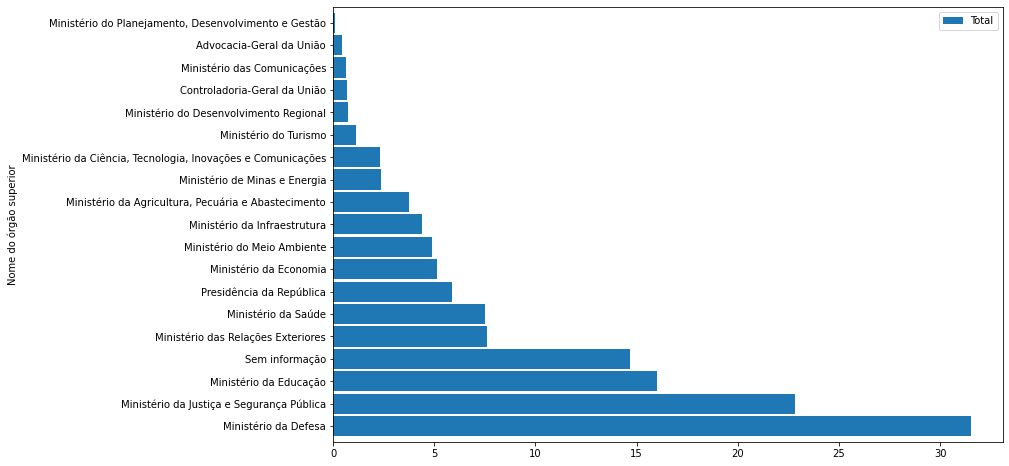

In [53]:
pd.plot(kind="barh", x="Nome do órgão superior", figsize=[12, 8], width=0.9)

# Qual pessoa física gastou mais em passagens?

In [64]:
df_typed.groupBy("Nome", "CPF viajante") \
    .agg((F.sum("ValorPassagens") / 1e+3).alias("ValorTotal")) \
    .orderBy("ValorTotal", ascending=False).limit(10).toPandas()

,Nome,CPF viajante,ValorTotal
0,Informações protegidas por sigilo,ID010900249,624.930150
1,BENTO COSTA LIMA LEITE DE ALBUQUERQUE JUNIOR,***.593.277-**,185.912851
2,MARCOS ROSAS DEGAUT PONTES,***.874.611-**,115.349950
3,RICARDO DE AQUINO SALLES,***.980.008-**,96.258690
4,LUIS ANTONIO DUIZIT BRITO,***.351.177-**,93.171620
5,CARLOS ALEXANDRE JORGE DA COSTA,***.332.127-**,89.248240
6,PAULO CESAR REZENDE DE CARVALHO ALVIM,***.374.181-**,77.557750
7,ROBERTO DE OLIVEIRA CAMPOS NETO,***.602.017-**,69.541880
8,ROGERIO SIMONETTI MARINHO,***.011.294-**,69.271400
9,ALEX BRAGA MUNIZ,***.839.037-**,67.236930


In [65]:
df_typed.groupBy("Nome", "CPF viajante") \
    .agg((F.sum("ValorPassagens") / 1e+3).alias("ValorTotal")) \
    .filter("Nome != 'Informações protegidas por sigilo'") \
    .orderBy("ValorTotal", ascending=False).limit(10).toPandas()

,Nome,CPF viajante,ValorTotal
0,BENTO COSTA LIMA LEITE DE ALBUQUERQUE JUNIOR,***.593.277-**,185.912851
1,MARCOS ROSAS DEGAUT PONTES,***.874.611-**,115.349950
2,RICARDO DE AQUINO SALLES,***.980.008-**,96.258690
3,LUIS ANTONIO DUIZIT BRITO,***.351.177-**,93.171620
4,CARLOS ALEXANDRE JORGE DA COSTA,***.332.127-**,89.248240
5,PAULO CESAR REZENDE DE CARVALHO ALVIM,***.374.181-**,77.557750
6,ROBERTO DE OLIVEIRA CAMPOS NETO,***.602.017-**,69.541880
7,ROGERIO SIMONETTI MARINHO,***.011.294-**,69.271400
8,ALEX BRAGA MUNIZ,***.839.037-**,67.236930
9,HERALDO LUIZ RODRIGUES,***.708.348-**,67.041831


In [66]:
df_typed.groupBy("Nome", "CPF viajante") \
    .agg(((F.sum("ValorPassagens") + F.sum("ValorDiarias") + F.sum("ValorOutros")  ) / 1e+3).alias("ValorTotal")) \
    .filter("Nome != 'Informações protegidas por sigilo'") \
    .orderBy("ValorTotal", ascending=False).limit(10).toPandas()

,Nome,CPF viajante,ValorTotal
0,MARCOS ROSAS DEGAUT PONTES,***.874.611-**,275.473870
1,BENTO COSTA LIMA LEITE DE ALBUQUERQUE JUNIOR,***.593.277-**,243.478750
2,LUIS ANTONIO DUIZIT BRITO,***.351.177-**,194.965211
3,LUIS FELIPE SILVERIO FORTUNA,***.966.727-**,185.475938
4,DYHEMES FERREIRA MARQUES,***.118.252-**,178.302474
5,LUCIANE SEVERO ROCHA,***.264.194-**,154.922194
6,GILSON GONZAGA DA SILVA,***.740.435-**,153.352797
7,FABRICIO CARNEIRO DE OLIVEIRA,***.053.406-**,150.420120
8,RICARDO DE AQUINO SALLES,***.980.008-**,145.383921
9,FABIANO DOS SANTOS SILVA,***.913.227-**,142.827203


In [69]:
df_typed.groupBy("Nome", "CPF viajante") \
    .agg(((F.sum("ValorPassagens") + F.sum("ValorDiarias") + F.sum("ValorOutros")  ) / 1e+3).alias("ValorTotal"),
         F.count("ValorPassagens").alias("Número de viagens")) \
    .filter("Nome != 'Informações protegidas por sigilo'") \
    .orderBy("ValorTotal", ascending=False).limit(10).toPandas()

,Nome,CPF viajante,ValorTotal,Número de viagens
0,MARCOS ROSAS DEGAUT PONTES,***.874.611-**,275.473870,17
1,BENTO COSTA LIMA LEITE DE ALBUQUERQUE JUNIOR,***.593.277-**,243.478750,52
2,LUIS ANTONIO DUIZIT BRITO,***.351.177-**,194.965211,15
3,LUIS FELIPE SILVERIO FORTUNA,***.966.727-**,185.475938,1
4,DYHEMES FERREIRA MARQUES,***.118.252-**,178.302474,1
5,LUCIANE SEVERO ROCHA,***.264.194-**,154.922194,1
6,GILSON GONZAGA DA SILVA,***.740.435-**,153.352797,1
7,FABRICIO CARNEIRO DE OLIVEIRA,***.053.406-**,150.420120,4
8,RICARDO DE AQUINO SALLES,***.980.008-**,145.383921,49
9,FABIANO DOS SANTOS SILVA,***.913.227-**,142.827203,1


In [70]:
df_typed.groupBy("Nome", "Nome do órgão superior", "CPF viajante") \
    .agg(((F.sum("ValorPassagens") + F.sum("ValorDiarias") + F.sum("ValorOutros")  ) / 1e+3).alias("ValorTotal"),
         F.count("ValorPassagens").alias("Número de viagens")) \
    .filter("Nome != 'Informações protegidas por sigilo'") \
    .orderBy("ValorTotal", ascending=False).limit(10).toPandas()

,Nome,Nome do órgão superior,CPF viajante,ValorTotal,Número de viagens
0,MARCOS ROSAS DEGAUT PONTES,Ministério da Defesa,***.874.611-**,275.473870,17
1,BENTO COSTA LIMA LEITE DE ALBUQUERQUE JUNIOR,Ministério de Minas e Energia,***.593.277-**,243.478750,52
2,LUIS ANTONIO DUIZIT BRITO,Ministério da Defesa,***.351.177-**,194.965211,15
3,LUIS FELIPE SILVERIO FORTUNA,Ministério das Relações Exteriores,***.966.727-**,185.475938,1
4,DYHEMES FERREIRA MARQUES,Sem informação,***.118.252-**,178.302474,1
5,LUCIANE SEVERO ROCHA,Sem informação,***.264.194-**,154.922194,1
6,GILSON GONZAGA DA SILVA,Sem informação,***.740.435-**,153.352797,1
7,FABRICIO CARNEIRO DE OLIVEIRA,Ministério da Saúde,***.053.406-**,150.420120,4
8,RICARDO DE AQUINO SALLES,Ministério do Meio Ambiente,***.980.008-**,145.383921,49
9,FABIANO DOS SANTOS SILVA,Sem informação,***.913.227-**,142.827203,1


# Como listar os gastos do MARCOS ROSAS DEGAUT PONTES ?
Secretário de Produtos de Defesa. Fonte: Google Search.

In [73]:
df_typed.filter((df_typed["Nome"] == 'MARCOS ROSAS DEGAUT PONTES') & \
                 (df_typed["CPF viajante"] == '***.874.611-**')).toPandas()

,Identificador do processo de viagem,Número da Proposta (PCDP),Situação,Viagem Urgente,Justificativa Urgência Viagem,Código do órgão superior,Nome do órgão superior,Código órgão solicitante,Nome órgão solicitante,CPF viajante,Nome,Cargo,Função,Descrição Função,Período - Data de início,Período - Data de fim,Destinos,Motivo,Valor diárias,Valor passagens,Valor outros gastos,ValorPassagens,ValorDiarias,ValorOutros
0,0000000000016836719,000151/20,Realizada,SIM,A designação oficial foi assinada na presente ...,52000,Ministério da Defesa,52000,Ministério da Defesa - Unidades com vínculo di...,***.874.611-**,MARCOS ROSAS DEGAUT PONTES,None,DAS-1016,Cargo Superior,21/01/2020,29/01/2020,Nova Delhi/Índia,"Participar, acompanhar e assessorar, por deter...","9501,15","13361,54","226,26",13361.540039,9501.150391,226.259995
1,0000000000016853019,000216/20,Não realizada,NÃO,Sem informação,52000,Ministério da Defesa,52000,Ministério da Defesa - Unidades com vínculo di...,***.874.611-**,MARCOS ROSAS DEGAUT PONTES,None,DAS-1016,Cargo Superior,08/02/2020,17/02/2020,Cingapura/Cingapura,Participar do Singapore Airshow 2020 e do Sing...,"9501,15","0,00","9751,22",0.000000,9501.150391,9751.219727
2,0000000000016864386,000281/20,Realizada,SIM,autorizado pela nota de serviço em anexo.,52000,Ministério da Defesa,52000,Ministério da Defesa - Unidades com vínculo di...,***.874.611-**,MARCOS ROSAS DEGAUT PONTES,None,DAS-1016,Cargo Superior,06/02/2020,07/02/2020,Gavião Peixoto/SP,- Participar de visita às instalações da EMBRA...,"525,95","3355,14","0,00",3355.139893,525.950012,0.000000
3,0000000000016882574,000415/20,Realizada,SIM,A presente missão foi aprovada através da Nota...,52000,Ministério da Defesa,52000,Ministério da Defesa - Unidades com vínculo di...,***.874.611-**,MARCOS ROSAS DEGAUT PONTES,None,DAS-1016,Cargo Superior,16/02/2020,17/02/2020,Rio de Janeiro/RJ,- Participar da Visita Técnica da Comitiva dos...,"481,65","2636,04","0,00",2636.040039,481.649994,0.000000
4,0000000000016899046,000472/20,Realizada,SIM,O convite chegou na SEPROD no dia 18 de fevere...,52000,Ministério da Defesa,52000,Ministério da Defesa - Unidades com vínculo di...,***.874.611-**,MARCOS ROSAS DEGAUT PONTES,None,DAS-1016,Cargo Superior,02/03/2020,03/03/2020,Rio de Janeiro/RJ,Participar da Cerimônia de comemoração do 250°...,"576,65","2174,94","0,00",2174.939941,576.650024,0.000000
5,0000000000016899111,000564/20-2C,Realizada,SIM,Autorização formal assinada na presente data.,52000,Ministério da Defesa,52000,Ministério da Defesa - Unidades com vínculo di...,***.874.611-**,MARCOS ROSAS DEGAUT PONTES,None,DAS-1016,Cargo Superior,07/03/2020,13/03/2020,"Miami/Estados Unidos da América, Washington/Es...",- Acompanhar a comitiva do Presidente da Repúb...,"17698,96","8489,18","4666,66",8489.179688,17698.960938,4666.660156
6,0000000000016906631,000494/20,Realizada,SIM,O Convite chegou hoje dia 21 de fevereiro de 2...,52000,Ministério da Defesa,52000,Ministério da Defesa - Unidades com vínculo di...,***.874.611-**,MARCOS ROSAS DEGAUT PONTES,None,DAS-1016,Cargo Superior,04/03/2020,05/03/2020,Rio de Janeiro/RJ,Participar de Reunião de estruturação do Gover...,"481,65","1305,04","0,00",1305.040039,481.649994,0.000000
7,0000000000017039227,001036/20-1C,Realizada,SIM,Em razão do cancelamento dos bilhetes de ida p...,52000,Ministério da Defesa,52000,Ministério da Defesa - Unidades com vínculo di...,***.874.611-**,MARCOS ROSAS DEGAUT PONTES,None,DAS-1016,Cargo Superior,20/08/2020,31/08/2020,Moscou/Rússia,Participar do Fórum Técnico-Militar Internacio...,"21092,28","27838,39","3903,21",27838.390625,21092.279297,3903.209961
8,0000000000017040823,000990/20,Realizada,SIM,"Em razão da pandemia, o evento formulado em ma...",52000,Ministério da Defesa,52000,Ministério da Defesa - Unidades com vínculo di...,***.874.611-**,MARCOS ROSAS DEGAUT PONTES,None,DAS-1016,Cargo Superior,21/07/2020,22/07/2020,Sem informação,Participar da Visita às instalações da Empresa...,"551,30","676,04","0,00",676.039978

# Agrupando por datas

Preciso converter a string para formato de data

In [75]:
df_typed.filter((df_typed["Nome"] == 'MARCOS ROSAS DEGAUT PONTES') & \
                 (df_typed["CPF viajante"] == '***.874.611-**')) \
.withColumn("dataPartida", F.to_date(df["Período - Data de início"], format="dd/MM/yyyy")) \
.toPandas()

,Identificador do processo de viagem,Número da Proposta (PCDP),Situação,Viagem Urgente,Justificativa Urgência Viagem,Código do órgão superior,Nome do órgão superior,Código órgão solicitante,Nome órgão solicitante,CPF viajante,Nome,Cargo,Função,Descrição Função,Período - Data de início,Período - Data de fim,Destinos,Motivo,Valor diárias,Valor passagens,Valor outros gastos,ValorPassagens,ValorDiarias,ValorOutros,dataPartida
0,0000000000016836719,000151/20,Realizada,SIM,A designação oficial foi assinada na presente ...,52000,Ministério da Defesa,52000,Ministério da Defesa - Unidades com vínculo di...,***.874.611-**,MARCOS ROSAS DEGAUT PONTES,None,DAS-1016,Cargo Superior,21/01/2020,29/01/2020,Nova Delhi/Índia,"Participar, acompanhar e assessorar, por deter...","9501,15","13361,54","226,26",13361.540039,9501.150391,226.259995,2020-01-21
1,0000000000016853019,000216/20,Não realizada,NÃO,Sem informação,52000,Ministério da Defesa,52000,Ministério da Defesa - Unidades com vínculo di...,***.874.611-**,MARCOS ROSAS DEGAUT PONTES,None,DAS-1016,Cargo Superior,08/02/2020,17/02/2020,Cingapura/Cingapura,Participar do Singapore Airshow 2020 e do Sing...,"9501,15","0,00","9751,22",0.000000,9501.150391,9751.219727,2020-02-08
2,0000000000016864386,000281/20,Realizada,SIM,autorizado pela nota de serviço em anexo.,52000,Ministério da Defesa,52000,Ministério da Defesa - Unidades com vínculo di...,***.874.611-**,MARCOS ROSAS DEGAUT PONTES,None,DAS-1016,Cargo Superior,06/02/2020,07/02/2020,Gavião Peixoto/SP,- Participar de visita às instalações da EMBRA...,"525,95","3355,14","0,00",3355.139893,525.950012,0.000000,2020-02-06
3,0000000000016882574,000415/20,Realizada,SIM,A presente missão foi aprovada através da Nota...,52000,Ministério da Defesa,52000,Ministério da Defesa - Unidades com vínculo di...,***.874.611-**,MARCOS ROSAS DEGAUT PONTES,None,DAS-1016,Cargo Superior,16/02/2020,17/02/2020,Rio de Janeiro/RJ,- Participar da Visita Técnica da Comitiva dos...,"481,65","2636,04","0,00",2636.040039,481.649994,0.000000,2020-02-16
4,0000000000016899046,000472/20,Realizada,SIM,O convite chegou na SEPROD no dia 18 de fevere...,52000,Ministério da Defesa,52000,Ministério da Defesa - Unidades com vínculo di...,***.874.611-**,MARCOS ROSAS DEGAUT PONTES,None,DAS-1016,Cargo Superior,02/03/2020,03/03/2020,Rio de Janeiro/RJ,Participar da Cerimônia de comemoração do 250°...,"576,65","2174,94","0,00",2174.939941,576.650024,0.000000,2020-03-02
5,0000000000016899111,000564/20-2C,Realizada,SIM,Autorização formal assinada na presente data.,52000,Ministério da Defesa,52000,Ministério da Defesa - Unidades com vínculo di...,***.874.611-**,MARCOS ROSAS DEGAUT PONTES,None,DAS-1016,Cargo Superior,07/03/2020,13/03/2020,"Miami/Estados Unidos da América, Washington/Es...",- Acompanhar a comitiva do Presidente da Repúb...,"17698,96","8489,18","4666,66",8489.179688,17698.960938,4666.660156,2020-03-07
6,0000000000016906631,000494/20,Realizada,SIM,O Convite chegou hoje dia 21 de fevereiro de 2...,52000,Ministério da Defesa,52000,Ministério da Defesa - Unidades com vínculo di...,***.874.611-**,MARCOS ROSAS DEGAUT PONTES,None,DAS-1016,Cargo Superior,04/03/2020,05/03/2020,Rio de Janeiro/RJ,Participar de Reunião de estruturação do Gover...,"481,65","1305,04","0,00",1305.040039,481.649994,0.000000,2020-03-04
7,0000000000017039227,001036/20-1C,Realizada,SIM,Em razão do cancelamento dos bilhetes de ida p...,52000,Ministério da Defesa,52000,Ministério da Defesa - Unidades com vínculo di...,***.874.611-**,MARCOS ROSAS DEGAUT PONTES,None,DAS-1016,Cargo Superior,20/08/2020,31/08/2020,Moscou/Rússia,Participar do Fórum Técnico-Militar Internacio...,"21092,28","27838,39","3903,21",27838.390625,21092.279297,3903.209961,2020-08-20
8,0000000000017040823,000990/20,Realizada,SIM,"Em razão da pandemia, o evento formulado em ma...",52000,Ministério da Defesa,52000,Ministério da Defesa - Unidades com vínculo di...,***.874.611-**,MARCOS ROSAS DEGAUT PONTES,None,DAS-1016,Cargo Superior,21/07/2020,22/07/2020,

In [83]:
pd_gasto = df_typed.filter((df_typed["Nome"] == 'MARCOS ROSAS DEGAUT PONTES') & \
                 (df_typed["CPF viajante"] == '***.874.611-**')) \
.withColumn("dataPartida", F.to_date(df["Período - Data de início"], format="dd/MM/yyyy")) \
.groupBy(F.month("dataPartida").alias("mesPartida")) \
.agg(((F.sum("ValorPassagens") + F.sum("ValorDiarias") + F.sum("ValorOutros")  ) / 1e+3).alias("ValorTotal"),
         F.count("ValorPassagens").alias("Número de viagens")) \
.orderBy("mesPartida") \
.toPandas()
pd_gasto


,mesPartida,ValorTotal,Número de viagens
0,1,23.088950,1
1,2,26.251150,3
2,3,35.393081,3
3,7,1.227340,1
4,8,55.295880,2
5,9,23.754440,2
6,10,83.792020,3
7,11,22.651539,1
8,12,4.019470,1


# O resultado dos gastos apresentado em gráfico

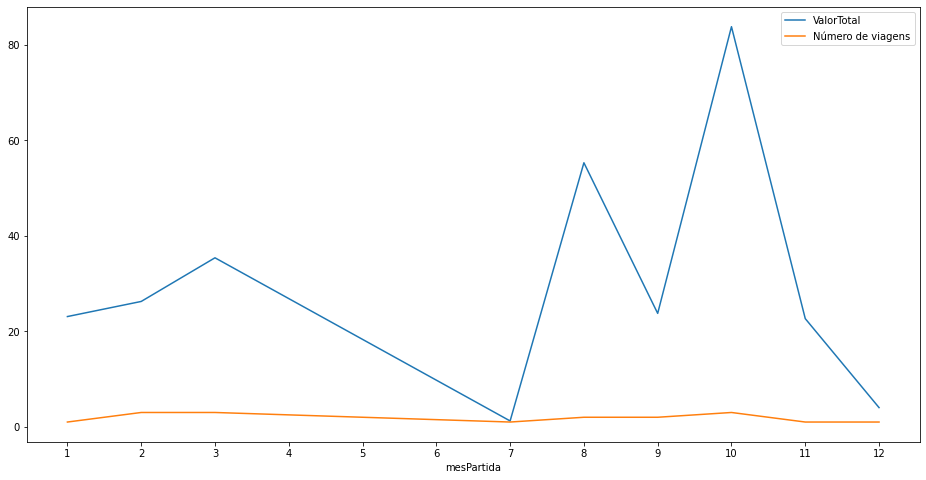

In [86]:
pd_gasto.plot(x="mesPartida", figsize=[16, 8], xticks=range(1,13))